### 전처리하기

In [48]:
import numpy as np
import pandas as pd

adr_df = pd.read_excel("./data/광진구_데이터프레임.xlsx",index_col=0)

In [49]:
adr_df.set_index("지번주소",inplace=True) # 인덱스 설정
adr_df.drop(columns=["도로명주소","위도","경도","소지역코드","지하철이름","주차장과의최단거리"],inplace=True) # 안쓸 데이터 드랍

In [50]:
adr_df.info() # 타입확인 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Index: 23216 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23216 non-null  float64
 1   총 사업체수                23216 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23216 non-null  int64  
 3   토지면적                  23216 non-null  object 
 4   공시지가_기준년월             23209 non-null  object 
 5   공시지가(원/면적)            23209 non-null  float64
 6   역과의최단거리               23216 non-null  int64  
 7   반경 1km 이내 주차장수        23216 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6+ MB


### 결측치 삭제

In [51]:
adr_df.dropna(inplace=True)

### 타입변환

In [52]:
adr_df["토지면적"] = pd.to_numeric(adr_df["토지면적"])

In [53]:
adr_df["공시지가(원/면적)"] = adr_df["공시지가(원/면적)"].astype(int)

### 공시지가_기준년월 2013->0, 2014-> 1, 2015-> 2, 2016-> 3, 2022/01-> 4, 2022/07->5

In [54]:
adr_df["공시지가_기준년월"].unique()

array(['2022년01월', '2022년07월', '2014년01월', '2013년01월', '2016년01월',
       '2015년01월'], dtype=object)

In [55]:
adr_df["공시지가_기준년월"].replace({"2013년01월":0,"2014년01월":1,"2015년01월":2,"2016년01월":3,"2022년01월":4,"2022년07월":5},inplace=True) 

In [56]:
adr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23209 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23209 non-null  float64
 1   총 사업체수                23209 non-null  int64  
 2   반경 1km 이내 불법주정차 단속 수  23209 non-null  int64  
 3   토지면적                  23209 non-null  float64
 4   공시지가_기준년월             23209 non-null  int64  
 5   공시지가(원/면적)            23209 non-null  int32  
 6   역과의최단거리               23209 non-null  int64  
 7   반경 1km 이내 주차장수        23209 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 1.5+ MB


In [57]:
adr_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,7067.70000,136,2,2211.80000,4,6324000,1144,41
서울특별시 광진구 광장동 104,7067.70000,136,2,172.10000,5,5097000,1166,41
서울특별시 광진구 광장동 105,7067.70000,136,2,848.80000,4,5202000,1068,41
서울특별시 광진구 광장동 106,7067.70000,136,2,452.80000,4,5097000,1038,41
서울특별시 광진구 광장동 107,7067.70000,136,2,403.90000,4,5793000,1011,42
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.10000,44,28,152.00000,4,4346000,630,75
서울특별시 광진구 화양동 96-2,52366.10000,44,31,165.00000,4,4346000,630,75
서울특별시 광진구 화양동 97,52366.10000,44,28,188.00000,4,5095000,633,74


### EDA

### 폰트 설정하기

In [58]:
def get_font():
    import matplotlib.font_manager as font_manager
    import matplotlib as mpl
# Add every font at the specified location
    font_dir = ['C:/Users/gihun/Fonts/']
    for font in font_manager.findSystemFonts(fontpaths=font_dir):
        print(mpl.font_manager.FontProperties(fname=font).get_name())
        font_manager.fontManager.addfont(font)
# Set font family globally
    mpl.rcParams['font.family'] = 'Nanum Brush Script OTF'
    return mpl.rcParams['font.family']

In [59]:
get_font()

Nanum CeorPirGeurSsi
NanumSquare Neo OTF ExtraBold
Nanum WaIrDeu
Nanum MasIssNeunCe
Nanum HaRamCe
Nanum HeuinGgoRiSuRi
Nanum YeorAHobEuiBanJjagIm
Nanum AJumMaJaYu
Nanum Pen Script
Nanum YuNiDdingDdangDdingDdang
Nanum OenSonJabIDoYeBbeo
Nanum DdaDdeusHanJagByeor
Nanum GyuRiEuiIrGi
Nanum BeomSomCe
Nanum AReumDeuRiGgocNaMu
Nanum SoBangGwanEuiGiDo
Nanum HanYunCe
Nanum GiBbeumBarkEum
Nanum AGiSaRangCe
Nanum GaRamYeonGgoc
Nanum YaGeunHaNeunGimJuIm
D2Coding
Nanum YeorIrCe
Nanum SinHonBuBu
Nanum JungHagSaeng
Nanum GarMaesGeur
Nanum GimYuICe
Nanum YeBbeunMinGyeongCe
NanumBarunpen
Nanum MaGoCe
Nanum ABbaEuiYeonAePyeonJi
NanumSquare Neo OTF Light
Nanum GeumEunBoHwa
Nanum GgeuTeuMeoRiCe
NanumSquare Neo ExtraBold
NanumSquare Neo OTF Bold
Nanum MuGungHwa
Nanum JaBuSimJiU
NanumSquare Neo Regular
Nanum URiDdarSonGeurSsi
Nanum GangBuJangNimCe
Nanum HaNaDoeEoSonGeurSsi
Nanum HaengBogHanDoBi
Nanum GoDigANiGoGoDing
Nanum SonPyeonJiCe
Nanum Brush Script
Nanum SeACe
Nanum BaeEunHyeCe
Nanum CoDingHeuiMang
Na

['Nanum Brush Script OTF']

In [60]:
# 기초통계량 확인하기
adr_df.describe()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
count,23209.00000,23209.00000,23209.00000,23209.00000,23209.00000,23209.00000,23209.00000,23209.00000
mean,34900.47317,66.49942,21.41040,360.39846,3.99914,5188882.95489,697.77776,94.11358
std,14909.84705,75.69475,8.30413,3905.62008,0.07711,1905827.59977,307.98036,32.10616
min,0.00000,0.00000,2.00000,1.00000,0.00000,29000.00000,6.00000,14.00000
25%,24129.40000,27.00000,15.00000,125.50000,4.00000,4186000.00000,480.00000,68.00000
50%,36796.50000,48.00000,22.00000,162.60000,4.00000,4905000.00000,660.00000,93.00000
75%,46032.50000,79.00000,28.00000,217.30000,4.00000,5647000.00000,864.00000,116.00000
max,138678.80000,1448.00000,45.00000,501359.00000,5.00000,47500000.00000,1907.00000,174.00000


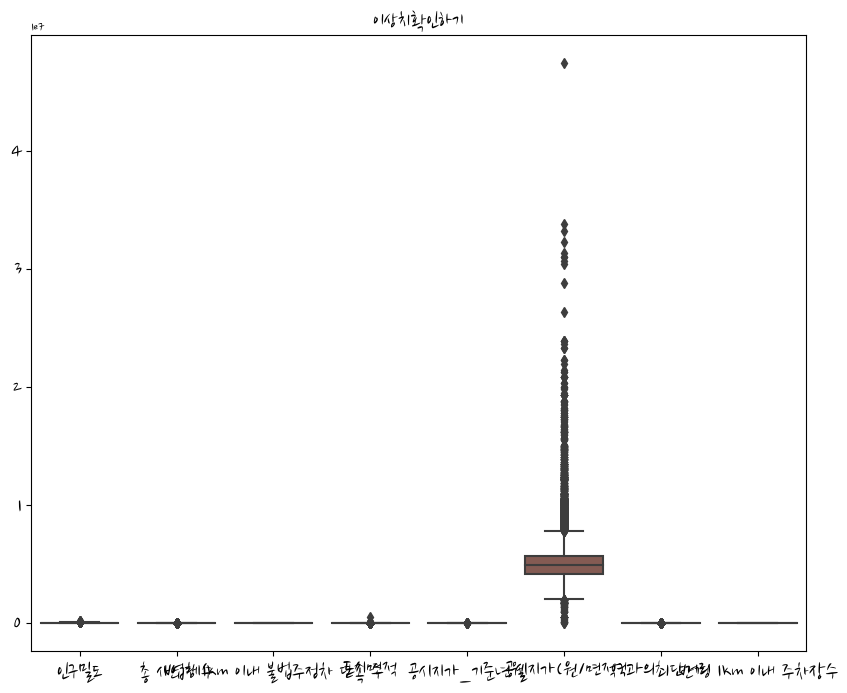

In [61]:
# 이상치 확인하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(adr_df)
plt.title("이상치확인하기",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [62]:
def remove_outliers(df, column_name):
    '''
    이상치 제거하는 함수입니다.
    '''
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [63]:
# 이상치 제거하기
adr_df = remove_outliers(adr_df, "공시지가(원/면적)")

c:\Users\gihun\Python_Data\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


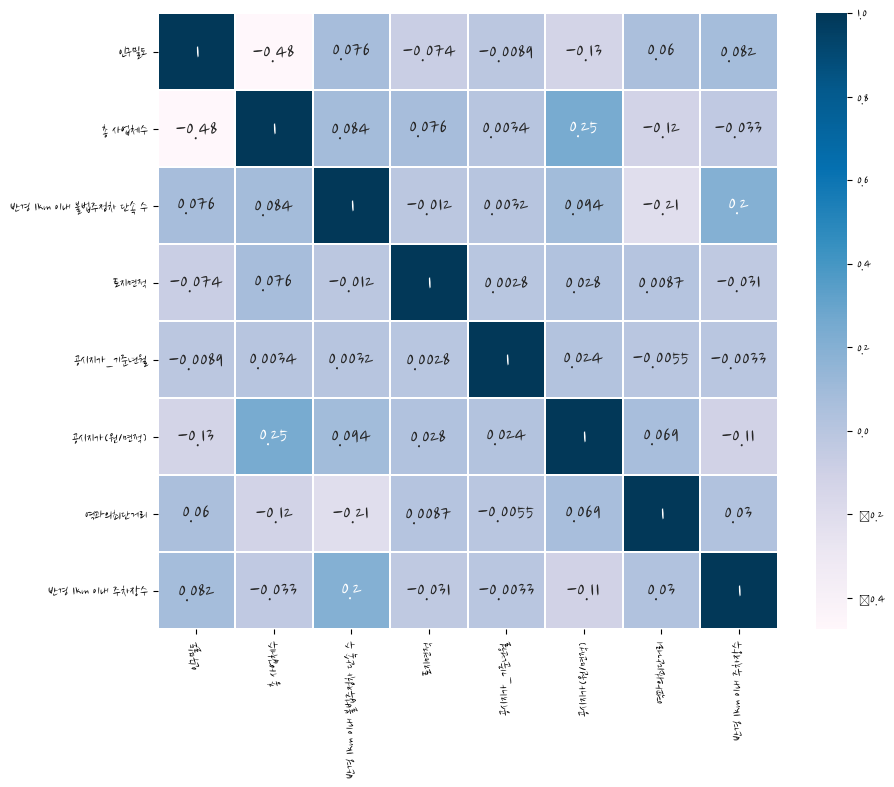

In [64]:
### 변수간 상관관계 분석하기
corr = adr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=plt.cm.PuBu,annot=True, annot_kws = {"size" : 16},linecolor = "white",linewidths = 0.1)
plt.show()

### 정규성 검정하기

In [65]:
def get_shapiro(df,column_name):
    from scipy import stats
    # 샤피로 검정
    statistic, pvalue = stats.shapiro(df[column_name])
    # 결과 출력
    print(f'statistic: {statistic:.4f}, p-value: {pvalue:.6f}')
    if pvalue > 0.05:
        print('Data follows normal distribution')
    else:
        print('Data does not follow normal distribution')

In [66]:
for item in list(adr_df.columns):
    print(item)
    get_shapiro(adr_df,item) # 공시지가_기준년월은 범주형 변수이므로 제외하기

인구밀도
statistic: 0.9753, p-value: 0.000000
Data does not follow normal distribution
총 사업체수
statistic: 0.5461, p-value: 0.000000
Data does not follow normal distribution
반경 1km 이내 불법주정차 단속 수
statistic: 0.9648, p-value: 0.000000
Data does not follow normal distribution
토지면적
statistic: 0.0549, p-value: 0.000000
Data does not follow normal distribution
공시지가_기준년월
statistic: 0.0065, p-value: 0.000000
Data does not follow normal distribution
공시지가(원/면적)
statistic: 0.9860, p-value: 0.000000
Data does not follow normal distribution
역과의최단거리
statistic: 0.9691, p-value: 0.000000
Data does not follow normal distribution
반경 1km 이내 주차장수
statistic: 0.9791, p-value: 0.000000
Data does not follow normal distribution


c:\Users\gihun\Python_Data\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [67]:
adr_df.dropna()

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,7067.70000,136,2,2211.80000,4,6324000,1144,41
서울특별시 광진구 광장동 104,7067.70000,136,2,172.10000,5,5097000,1166,41
서울특별시 광진구 광장동 105,7067.70000,136,2,848.80000,4,5202000,1068,41
서울특별시 광진구 광장동 106,7067.70000,136,2,452.80000,4,5097000,1038,41
서울특별시 광진구 광장동 107,7067.70000,136,2,403.90000,4,5793000,1011,42
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.10000,44,28,152.00000,4,4346000,630,75
서울특별시 광진구 화양동 96-2,52366.10000,44,31,165.00000,4,4346000,630,75
서울특별시 광진구 화양동 97,52366.10000,44,28,188.00000,4,5095000,633,74


In [68]:
def plot_histograms(df):
    for column in df.columns:
        plt.hist(df[column], bins=20)
        plt.title(column)
        plt.show()

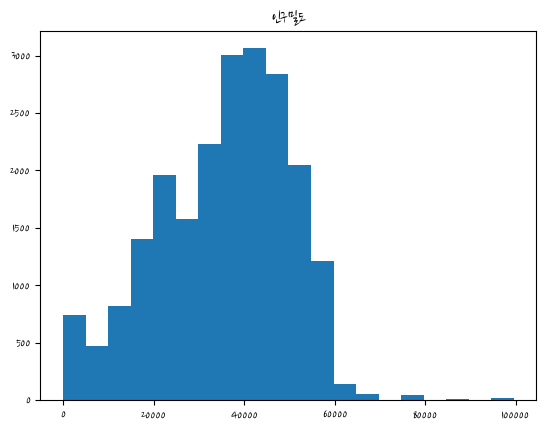

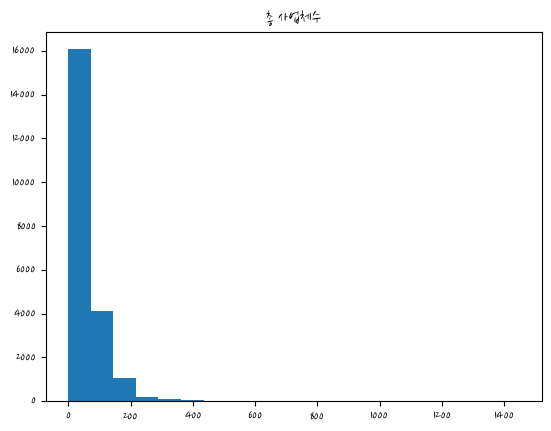

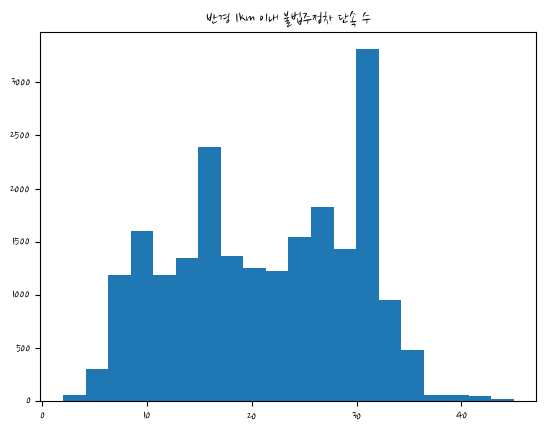

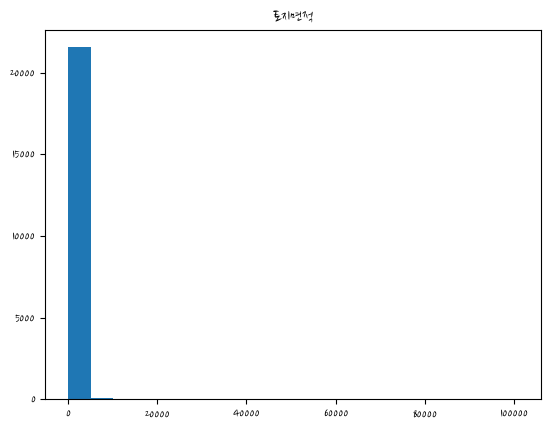

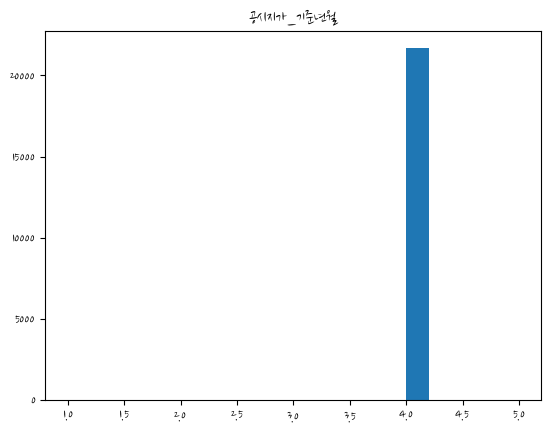

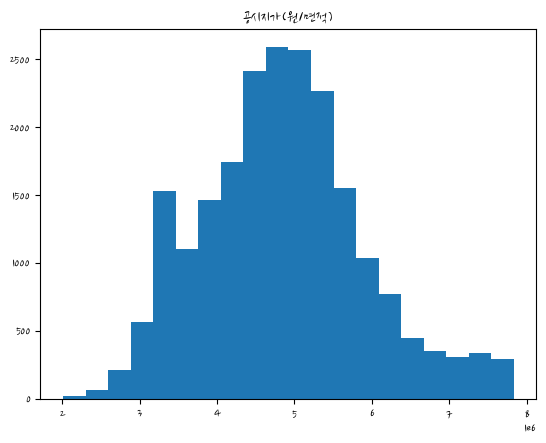

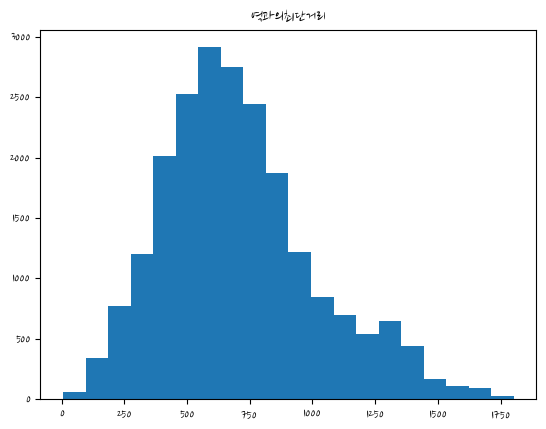

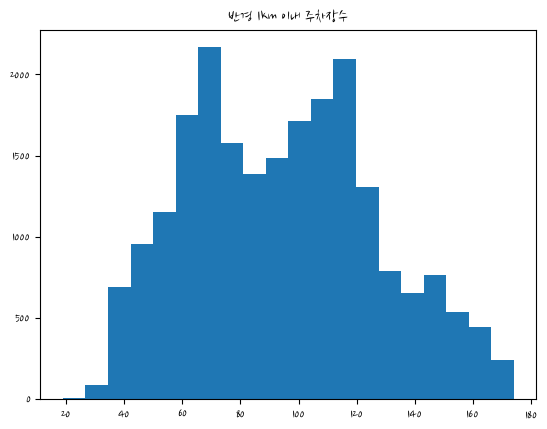

In [69]:
plot_histograms(adr_df)

### 양수 인것들만 로그 변환해서 데이터 분포 변환하기

In [70]:
# 로그 변환하기 전의 데이터프레임 복사
adr_df2 = adr_df.copy()

In [71]:
def log_transform(dataframe, columns):
    for column in columns:
        filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
        dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

In [72]:
log_df = log_transform(adr_df, adr_df.columns)

C:\Users\gihun\AppData\Local\Temp\ipykernel_2300\1113042258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = np.log(filtered) # apply log transformation


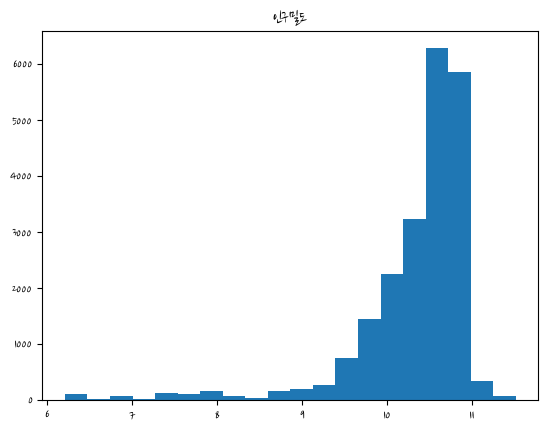

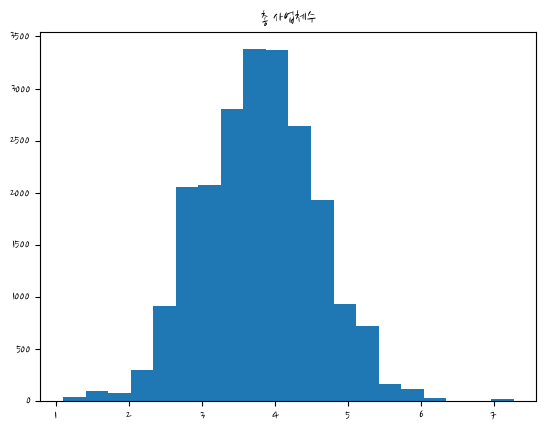

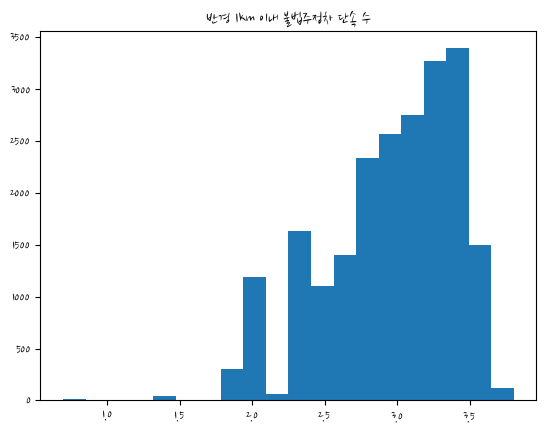

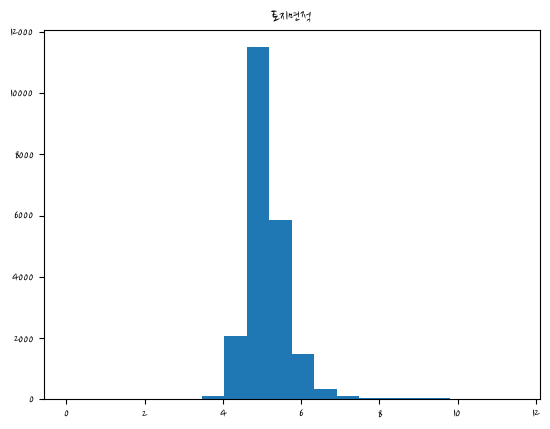

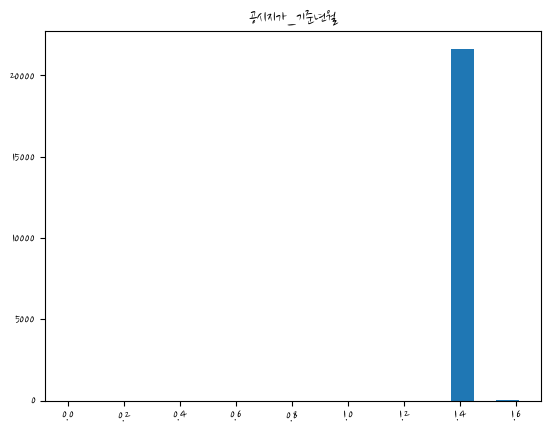

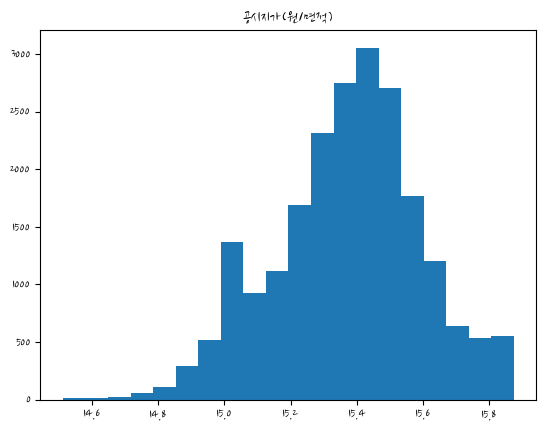

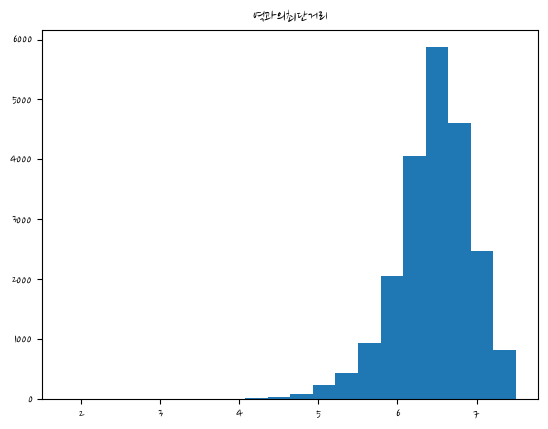

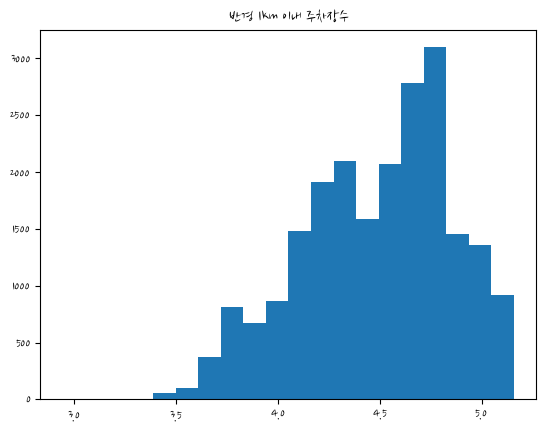

In [73]:
plot_histograms(log_df)

### Box-cow 변환

In [74]:
log_df.dropna(inplace=True) # 로그 변환

c:\Users\gihun\Python_Data\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### UMAP

In [75]:
import umap
clustering_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(adr_df.values)

### HDBSCAN 클러스터링

In [84]:
import hdbscan
labels = hdbscan.HDBSCAN(
    algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40,
    metric='euclidean', min_cluster_size=10, min_samples=500
).fit_predict(clustering_embedding)

In [79]:
def get_all_cluster(embedding,labels):
    # 노이즈 포인트 다 포함
    plt.scatter(embedding[:, 0], embedding[:, 1],
                c=labels,s=0.1, cmap='Spectral')
def get_noise_cluster(embedding,labels):
    # 노이즈 포인트만
    clustered = (labels >= 0)
    plt.scatter(embedding[~clustered, 0],
                embedding[~clustered, 1],
                color=(0.5, 0.5, 0.5),
                s=0.1,
                alpha=0.5)
def get_cluster(embedding,labels):
    # 노이즈 포인트 제외
    clustered = (labels >= 0)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                c=labels[clustered],
                s=0.1,
                cmap='Spectral')

C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


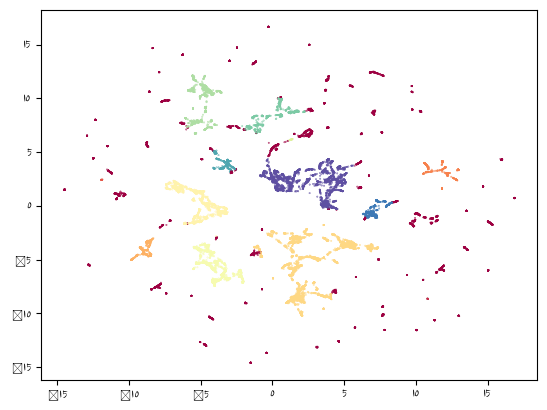

In [85]:
get_all_cluster(clustering_embedding,labels)

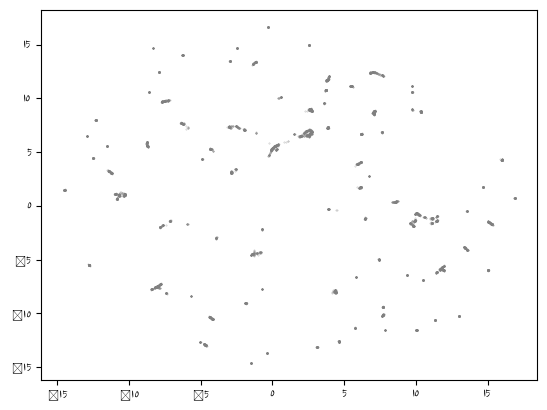

In [86]:
get_noise_cluster(clustering_embedding,labels)

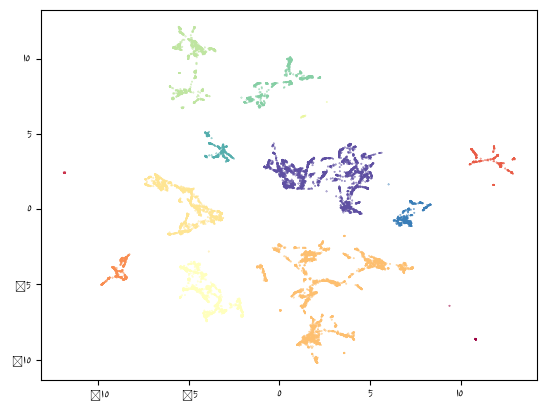

In [87]:
get_cluster(clustering_embedding,labels)

In [88]:
# 로그 변환 하기 전의 원데이터프레임
for i in adr_df2.columns:
    adr_df2 = adr_df2[adr_df2[i] > 0]

In [89]:
adr_df2["Cluster1"] = labels
adr_df2

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수,Cluster1
지번주소,,,,,,,,,
서울특별시 광진구 광장동 102,7067.70000,136,2,2211.80000,4,6324000,1144,41,-1
서울특별시 광진구 광장동 104,7067.70000,136,2,172.10000,5,5097000,1166,41,-1
서울특별시 광진구 광장동 105,7067.70000,136,2,848.80000,4,5202000,1068,41,-1
서울특별시 광진구 광장동 106,7067.70000,136,2,452.80000,4,5097000,1038,41,-1
서울특별시 광진구 광장동 107,7067.70000,136,2,403.90000,4,5793000,1011,42,-1
...,...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.10000,44,28,152.00000,4,4346000,630,75,12
서울특별시 광진구 화양동 96-2,52366.10000,44,31,165.00000,4,4346000,630,75,12
서울특별시 광진구 화양동 97,52366.10000,44,28,188.00000,4,5095000,633,74,12


### 공시지가_기준년월 지우고 해보기

In [90]:
import umap
clustering_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(adr_df.drop("공시지가_기준년월",axis=1).values)

In [91]:
labels = hdbscan.HDBSCAN(
    algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40,
    metric='euclidean', min_cluster_size=10, min_samples=500
).fit_predict(clustering_embedding)

C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gihun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


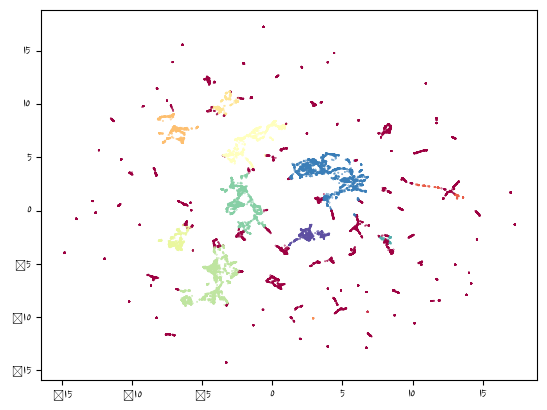

In [92]:
get_all_cluster(clustering_embedding,labels)

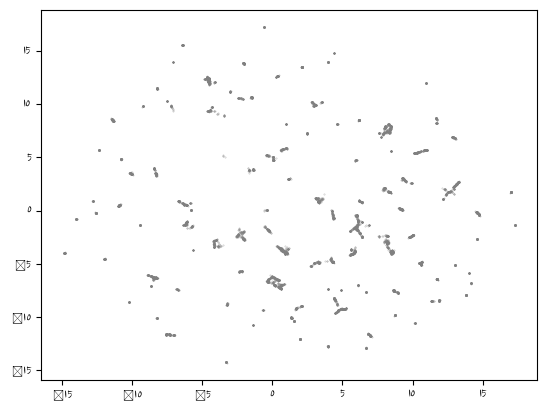

In [93]:
get_noise_cluster(clustering_embedding,labels)

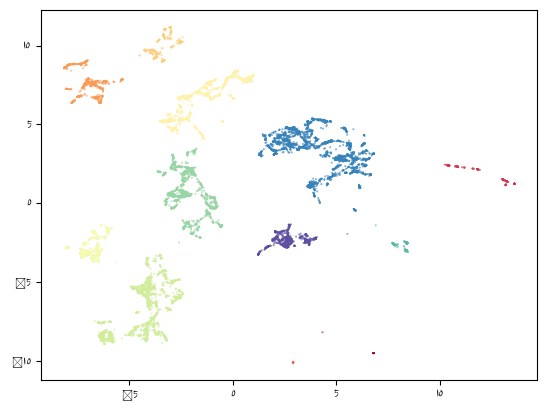

In [94]:
get_cluster(clustering_embedding,labels)

In [95]:
adr_df2["Cluster2"] = labels

In [96]:
adr_df2

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,토지면적,공시지가_기준년월,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수,Cluster1,Cluster2
지번주소,,,,,,,,,,
서울특별시 광진구 광장동 102,7067.70000,136,2,2211.80000,4,6324000,1144,41,-1,-1
서울특별시 광진구 광장동 104,7067.70000,136,2,172.10000,5,5097000,1166,41,-1,-1
서울특별시 광진구 광장동 105,7067.70000,136,2,848.80000,4,5202000,1068,41,-1,-1
서울특별시 광진구 광장동 106,7067.70000,136,2,452.80000,4,5097000,1038,41,-1,-1
서울특별시 광진구 광장동 107,7067.70000,136,2,403.90000,4,5793000,1011,42,-1,-1
...,...,...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.10000,44,28,152.00000,4,4346000,630,75,12,10
서울특별시 광진구 화양동 96-2,52366.10000,44,31,165.00000,4,4346000,630,75,12,10
서울특별시 광진구 화양동 97,52366.10000,44,28,188.00000,4,5095000,633,74,12,10


In [97]:
pd.options.display.float_format = '{:.5f}'.format

In [98]:
adr_df2.to_excel("./data/광진구_클러스터링.xlsx")